In [34]:
import os
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

In [35]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    size = 3*sigma #ignore values outside of 3*sigma
    h = np.ones(2*size) 
    for x in range(-size,size):
        h[x+size] = (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(np.square(x)/(2*np.square(sigma))))
    return h
h = gaussian_filter_1d(5)

In [36]:
current_directory_split = os.getcwd().split('\\')
data_directory = ''
for i in current_directory_split[:-2]:
    data_directory += i + '\\'
data_directory = data_directory + 'dataLog.csv'
df = pd.read_csv(data_directory)

In [37]:
df.index = df.index+1
df.loc[0] = df.columns
df.sort_index(inplace=True)
df = df[df.columns[0:4]].copy()
df.columns = ['timeNow','harmfulHEVIntensity', 'overallLightIntensity', 'artificialLightBool']
df[['harmfulHEVIntensity', 'overallLightIntensity', 'artificialLightBool']] = df[['harmfulHEVIntensity', 'overallLightIntensity', 'artificialLightBool']].apply(pd.to_numeric)
df['timeNow'] = pd.to_datetime(df['timeNow']).copy()
df

,timeNow,harmfulHEVIntensity,overallLightIntensity,artificialLightBool
0,2022-03-01 00:14:02,0.239304,0.739202,1
1,2022-03-01 00:14:08,0.242296,0.741949,1
2,2022-03-01 00:14:13,0.242145,0.741479,1
3,2022-03-01 00:14:18,0.242242,0.741799,1
4,2022-03-01 00:14:23,0.242285,0.742159,1
...,...,...,...,...
115,2022-03-01 00:24:00,0.242472,0.741700,1
116,2022-03-01 00:24:06,0.242474,0.742319,1
117,2022-03-01 00:24:11,0.242459,0.742426,1
118,2022-03-01 00:24:16,0.242501,0.742172,1


In [38]:
df['timeNow'].iloc[-1]

Timestamp('2022-03-01 00:24:21')

In [39]:
time_of_last_collection = df['timeNow'].iloc[-1]
df.loc[((time_of_last_collection - df.timeNow).dt.total_seconds()/60) < 15]

,timeNow,harmfulHEVIntensity,overallLightIntensity,artificialLightBool
0,2022-03-01 00:14:02,0.239304,0.739202,1
1,2022-03-01 00:14:08,0.242296,0.741949,1
2,2022-03-01 00:14:13,0.242145,0.741479,1
3,2022-03-01 00:14:18,0.242242,0.741799,1
4,2022-03-01 00:14:23,0.242285,0.742159,1
...,...,...,...,...
115,2022-03-01 00:24:00,0.242472,0.741700,1
116,2022-03-01 00:24:06,0.242474,0.742319,1
117,2022-03-01 00:24:11,0.242459,0.742426,1
118,2022-03-01 00:24:16,0.242501,0.742172,1


In [40]:
data = []
harmfulHEVIntensity_data = list(df['harmfulHEVIntensity'])
overallLightIntensity_data = list(df['overallLightIntensity'])
data.append(harmfulHEVIntensity_data)
data.append(overallLightIntensity_data)
data.append([0.4 for x in harmfulHEVIntensity_data])
labels = list(df['timeNow'].dt.strftime('%Y-%m-%d, %H:%M'))

In [41]:
df['harmfulHEVIntensity'] = gaussian_filter1d(df['harmfulHEVIntensity'].values, 5)

In [42]:
threshold = 0.4
number_of_entries = len(df)
number_of_entries_more_than_threshold = len(df.loc[df.harmfulHEVIntensity > threshold])
perc = round(number_of_entries_more_than_threshold/number_of_entries*100)
perc

0

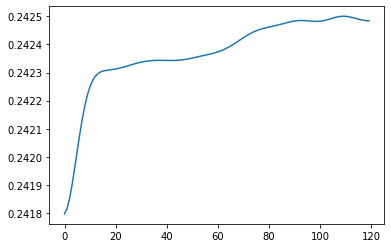

In [43]:
data = df['harmfulHEVIntensity']
plt.plot(data)

In [46]:

blu = df['harmfulHEVIntensity'].apply(lambda x: x if x <= 0.4 else np.NaN)

In [47]:
blu

0      0.241797
1      0.241816
2      0.241853
3      0.241904
4      0.241962
         ...   
115    0.242490
116    0.242487
117    0.242486
118    0.242484
119    0.242484
Name: harmfulHEVIntensity, Length: 120, dtype: float64